**STEP 1 : LOADING THE DATASET**

In [3]:
import pandas as pd

data=pd.read_csv('Titanic-Dataset.csv')

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**STEP 2 DATA CLEANING**

In [4]:
#handling missing values

data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [12]:
# As the data shows missing values in Age, Cabin, and Embarked. We will:

# Fill missing 'Age' with mean values
data['Age'].fillna(data['Age'].mean, inplace=True)

# Fill missing 'Embarked' with mode
data['Embarked'].fillna(data['Embarked'].mode, inplace=True)

# Drop 'Cabin' due to excessive missing values
data.drop(columns='Cabin', inplace=True)


In [13]:
# Removing duplicates

data.drop_duplicates(inplace=True)

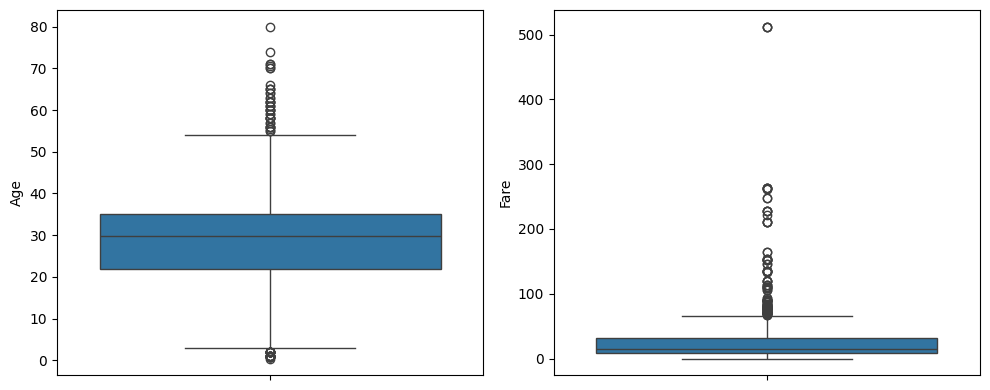

In [15]:
# To identify outliers, we will use Box Plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.boxplot(y='Age', data=data)
plt.subplot(1, 2, 2)
sns.boxplot(y='Fare', data=data)
plt.tight_layout()
plt.show()

In [16]:
#As the data shows outliers, we will manage them using Inter Quartile Range

def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Apply to 'Age' and 'Fare'
data = remove_outliers_iqr(data, 'Age')
data = remove_outliers_iqr(data, 'Fare')



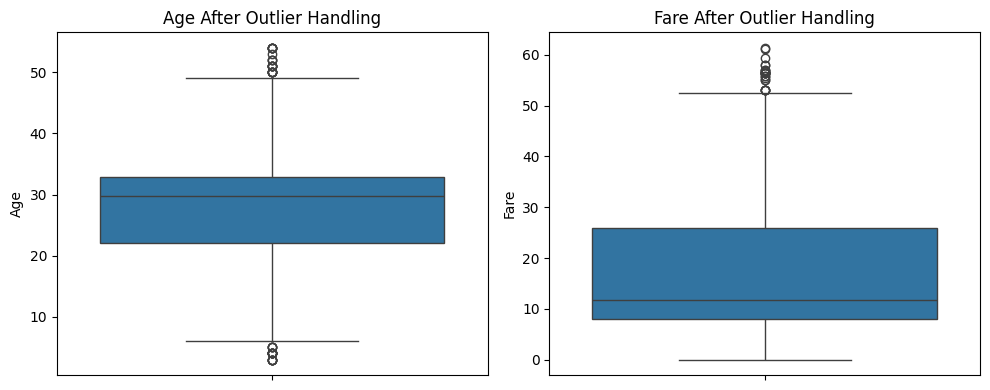

In [17]:
# Checking Box Plot again to see managed outliers


plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.boxplot(y='Age', data=data)
plt.title('Age After Outlier Handling')

plt.subplot(1, 2, 2)
sns.boxplot(y='Fare', data=data)
plt.title('Fare After Outlier Handling')

plt.tight_layout()
plt.show()

**STEP 3 : VISUALIZATION**

<ipython-input-24-3f82e98bc749>:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


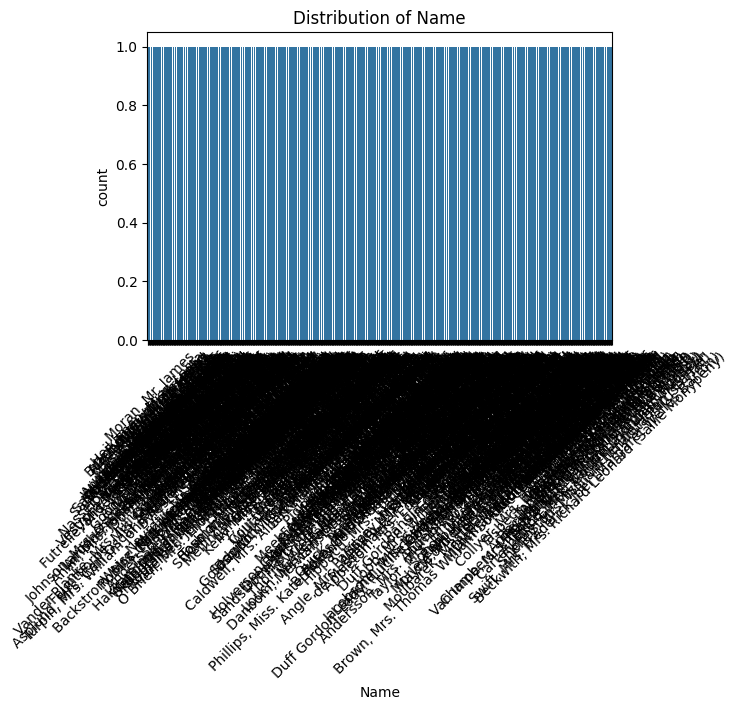

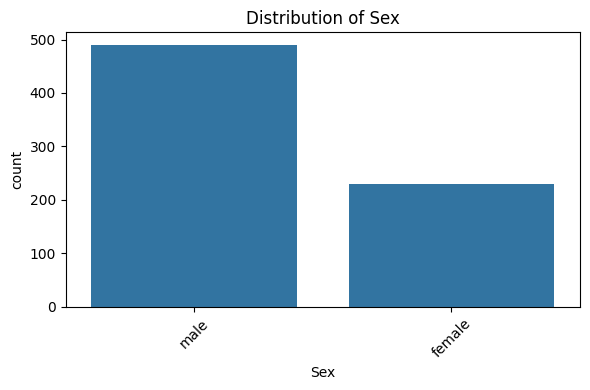

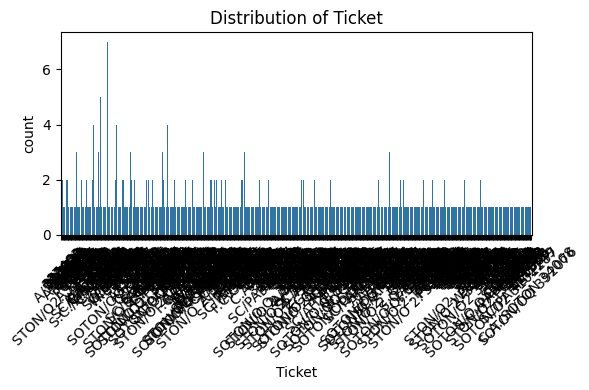

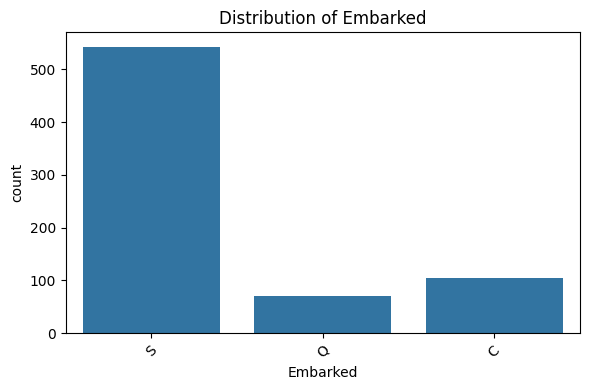

In [24]:
# We will make bar charts for categorical variables


categorical_cols = data.select_dtypes(include=['object', 'category']).columns

for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=data)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

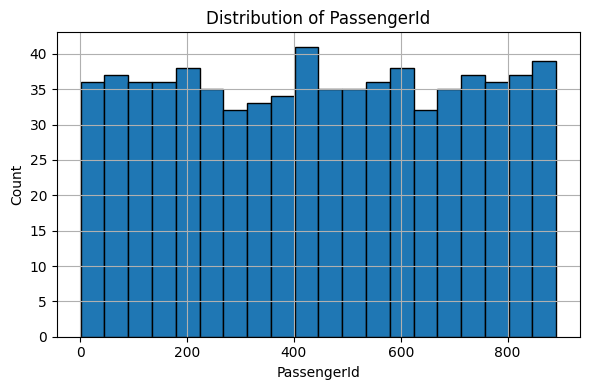

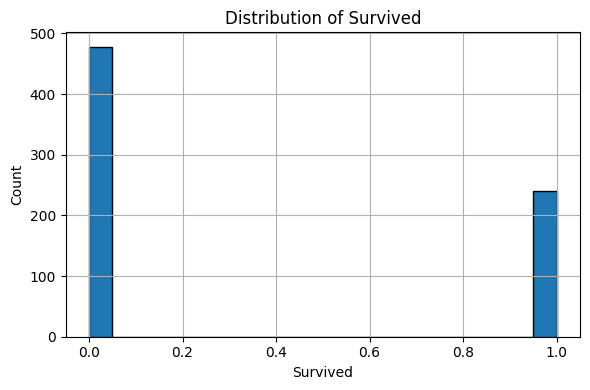

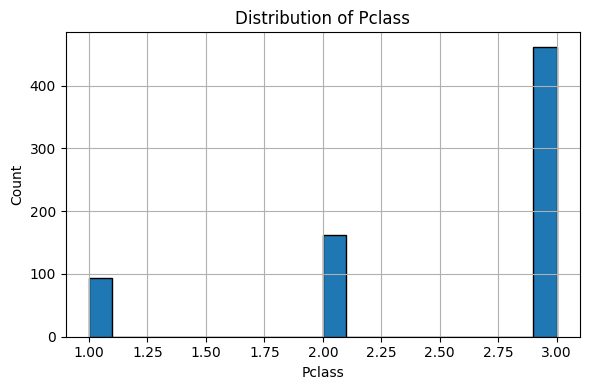

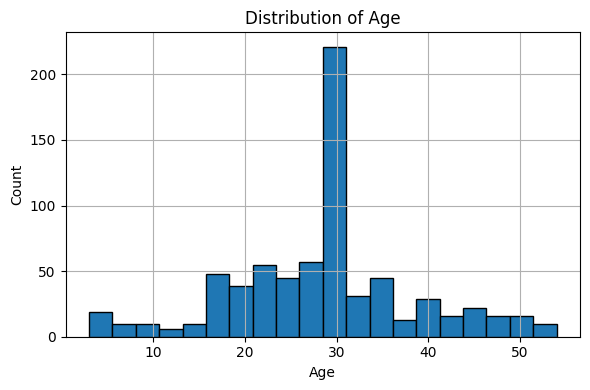

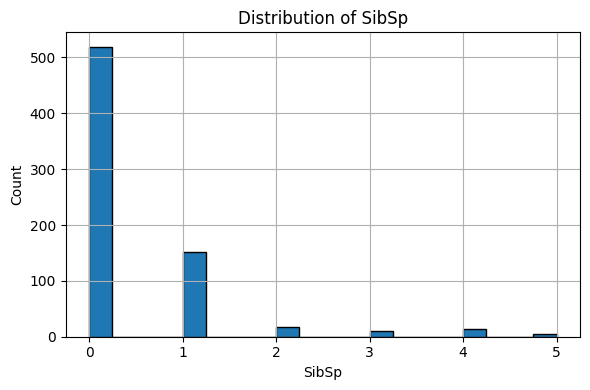

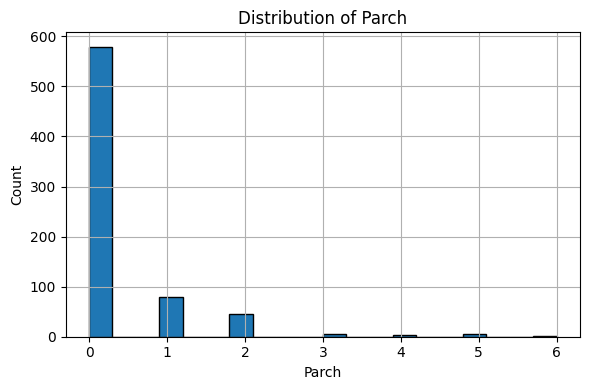

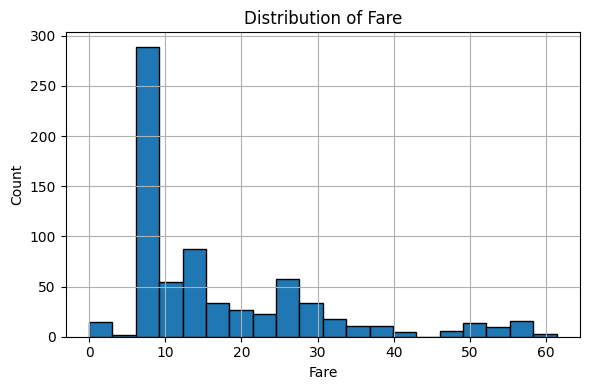

In [26]:
# We will make histogram for few numeric distributions


numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    data[col].hist(bins=20, edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()


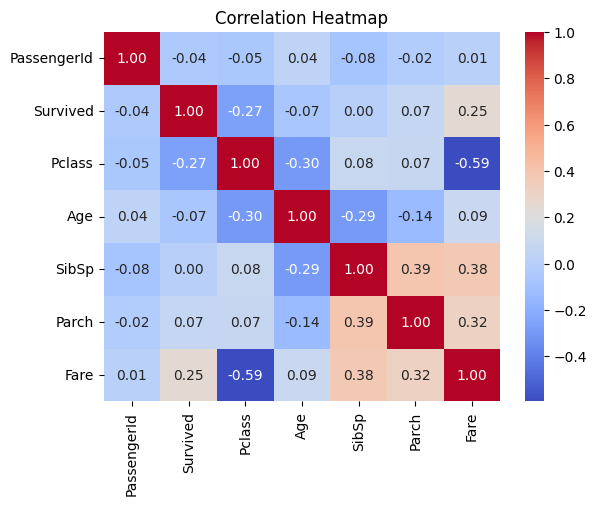

In [23]:
# correlation heatmap for numeric feature

import numpy as np


numeric_df = data.select_dtypes(include=[np.number])

corr = numeric_df.corr()


sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


**FOR SUMMARY**

Sex
female    0.685590
male      0.169734
Name: Survived, dtype: float64

Pclass
1    0.563830
2    0.469136
3    0.240260
Name: Survived, dtype: float64

Axes(0.125,0.11;0.775x0.77)


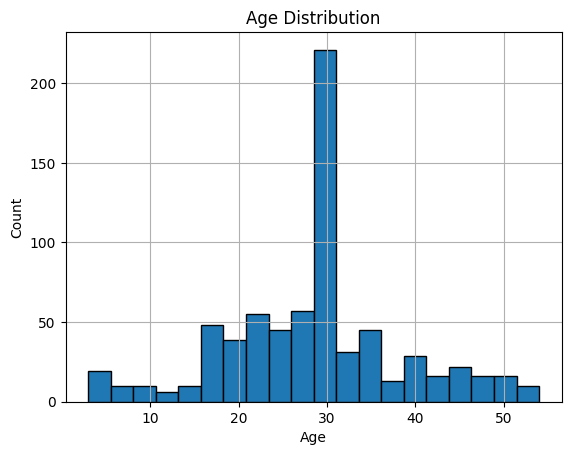


Axes(0.125,0.11;0.775x0.77)


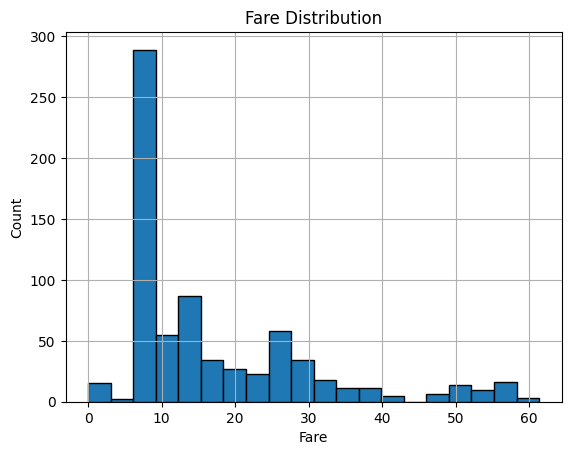

In [33]:
print(data.groupby('Sex')['Survived'].mean())
print()
print(data.groupby('Pclass')['Survived'].mean())
print()
print(data['Age'].hist(bins=20, edgecolor='black'))
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()
print()
print(data['Fare'].hist(bins=20, edgecolor='black'))
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

**SUMMARY**


Gender and Survival: Females had a higher survival rate than males.

Passenger Class Impact: First-class passengers were more likely to survive than those in third class.

Age Distribution: Most passengers were between 20-40 years old.

Fare Outliers: Some passengers paid significantly more; log-transforming Fare might help with modeling.

Correlation Insight: Fare and Pclass show a moderate inverse correlation.